# Board games are awesome!
And we're going to find out the most awesome of qualities 

In [1]:
#data wrangle
import pandas as pd
import numpy as np

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#py funtions
import acquire
import prepare
import explore

import warnings
warnings.filterwarnings('ignore')

## Acquire

The dataset was created by webscrapping BoardGameGeek.com. This website has an api where the majority of values were pulled from. The actual rankings and ratings were not contained in the api and were therefore pulled from the browse page. 

The top 2000 games and their respective attributes were pulled and saved to a .csv file, which is linked in the readme. 

In [2]:
df = acquire.get_games()

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 15 columns):
name_clean     2000 non-null object
geek_rating    2000 non-null float64
avg_rating     2000 non-null float64
votes          2000 non-null int64
name           2000 non-null object
year           2000 non-null int64
min_players    2000 non-null int64
max_players    2000 non-null int64
min_time       2000 non-null int64
max_time       2000 non-null int64
designer       2000 non-null object
category       2000 non-null object
mechanic       2000 non-null object
publisher      2000 non-null object
description    2000 non-null object
dtypes: float64(2), int64(6), object(7)
memory usage: 250.0+ KB


,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30159,Gloomhaven,2017,1,4,60,120,Isaac Childres,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,8.473,8.63,34114,Pandemic Legacy: Season 1,2015,2,4,60,60,Rob Daviau,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Z-Man Games, Inc.', 'Asterion Press', 'Devir...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,8.261,8.42,46739,Terraforming Mars,2016,1,5,120,120,Jacob Fryxelius,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,8.239,8.50,17888,Through the Ages: A New Story of Civilization,2015,2,4,120,120,Vlaada Chvátil,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Czech Games Edition', 'Cranio Creations', 'D...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,8.187,8.62,9358,Brass: Birmingham,2018,2,4,60,120,Gavan Brown,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Roxley', 'BoardM Factory', 'Conclave Editora...",Brass: Birmingham is an economic strategy game...


## Prepare

Since the list of attributes were pulled from two different locations (the browse page and the game's individual api), compare the names from both locations to ensure they match.

In [4]:
df [df.name_clean != df.name]

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
101,War of the Ring (First Edition),7.455,7.77,9584,War of the Ring,2004,2,4,120,120,Roberto Di Meglio,"['Adventure', 'Fantasy', 'Miniatures', 'Novel-...","['Action Points', 'Area Majority / Influence',...","['Ares Games', 'Asmodee', 'Devir', 'Fantasy Fl...","In War of the Ring, one player takes control o..."
1400,\nCarrom\n,6.282,7.00,1467,Carrom,0,2,4,60,60,(Uncredited),['Action / Dexterity'],"['Flicking', 'Team-Based Game']","['(Public Domain)', '(Unknown)', 'ABRA', 'ASS ...",Carrom is most easily described as &quot;finge...


> For Carrom, the name column should be retained. The War of the Ring game will be further investigated. 

In [5]:
df [df.name_clean.str.startswith("War of the Ring")]

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
12,War of the Ring (Second Edition),8.060,8.45,10955,War of the Ring (Second Edition),2012,2,4,150,180,Roberto Di Meglio,"['Adventure', 'Fantasy', 'Fighting', 'Miniatur...","['Action Drafting', 'Area Majority / Influence...","['Ares Games', 'Angry Lion Games', 'Devir', 'G...","In War of the Ring, one player takes control o..."
101,War of the Ring (First Edition),7.455,7.77,9584,War of the Ring,2004,2,4,120,120,Roberto Di Meglio,"['Adventure', 'Fantasy', 'Miniatures', 'Novel-...","['Action Points', 'Area Majority / Influence',...","['Ares Games', 'Asmodee', 'Devir', 'Fantasy Fl...","In War of the Ring, one player takes control o..."


> For 'War of the Ring (First Edition)', the name_clean should be retained

In [6]:
# replace War of the Ring "name" with "name_clean"
df.name.iloc[100] = df.name_clean.iloc[100]

# drop "name_clean" column
df.drop('name_clean', axis=1, inplace=True)

# this moves the "name" column to the beginning
df.insert(0,'name',df.pop("name"))

In [8]:
df.head()

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30159,2017,1,4,60,120,Isaac Childres,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,8.473,8.63,34114,2015,2,4,60,60,Rob Daviau,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Z-Man Games, Inc.', 'Asterion Press', 'Devir...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,8.261,8.42,46739,2016,1,5,120,120,Jacob Fryxelius,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,8.239,8.50,17888,2015,2,4,120,120,Vlaada Chvátil,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Czech Games Edition', 'Cranio Creations', 'D...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,8.187,8.62,9358,2018,2,4,60,120,Gavan Brown,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Roxley', 'BoardM Factory', 'Conclave Editora...",Brass: Birmingham is an economic strategy game...


In [12]:
print(f'There are {len(df)} games in the dataset. There are {df.name.nunique()} unique games in the datasets.')

There are 2000 games in the dataset. There are 1993 unique games in the datasets.


> These values should match and they do not. Investigate further. 

In [13]:
df [df.duplicated()]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1601,Waggle Dance,6.202,7.02,1164,2014,2,4,30,90,Mike Nudd,"['Animals', 'Dice', 'Environmental']","['Dice Rolling', 'Set Collection', 'Worker Pla...",['Grublin Games Publishing'],"Build a beehive, collect nectar, and make hone..."


In [14]:
df [df.name == "Waggle Dance"]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1600,Waggle Dance,6.202,7.02,1164,2014,2,4,30,90,Mike Nudd,"['Animals', 'Dice', 'Environmental']","['Dice Rolling', 'Set Collection', 'Worker Pla...",['Grublin Games Publishing'],"Build a beehive, collect nectar, and make hone..."
1601,Waggle Dance,6.202,7.02,1164,2014,2,4,30,90,Mike Nudd,"['Animals', 'Dice', 'Environmental']","['Dice Rolling', 'Set Collection', 'Worker Pla...",['Grublin Games Publishing'],"Build a beehive, collect nectar, and make hone..."


> This game is exactly duplicated and will be dropped from the dataset. 

In [18]:
df.drop(index=1601, inplace=True)

In [22]:
df [df.name.duplicated(keep=False)].sort_values("name")

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1205,Axis & Allies,6.366,6.71,5648,2004,2,5,240,240,"Larry Harris, Jr.","['Economic', 'Wargame', 'World War II']","['Area Movement', 'Dice Rolling', 'Team-Based ...","['Avalon Hill Games, Inc.', 'Tilsit']",Axis &amp; Allies (2004) aka Axis &amp; Allies...
1326,Axis & Allies,6.308,6.56,9838,1981,2,5,180,180,"Larry Harris, Jr.","['Economic', 'Wargame', 'World War II']","['Area Movement', 'Dice Rolling', 'Minimap Res...","['Jedko Games', 'Milton Bradley', 'Nova Game D...",Axis and Allies is the most successful of Milt...
368,Citadels,6.993,7.09,45090,2000,2,8,20,60,Bruno Faidutti,"['Bluffing', 'Card Game', 'City Building', 'De...","['Action Drafting', 'Card Drafting', 'Set Coll...","['Hans im Glück', '(Unknown)', '999 Games', 'A...","In Citadels, players take on new roles each ro..."
480,Citadels,6.876,7.35,4835,2016,2,8,30,60,Bruno Faidutti,"['Bluffing', 'Card Game', 'City Building', 'Fa...","['Card Drafting', 'Set Collection', 'Turn Orde...","['(Unknown)', '999 Games', 'Asmodee', 'Delta V...","In Citadels, players take on new roles each ro..."
128,Cosmic Encounter,7.386,7.55,25080,2008,3,5,60,120,Bill Eberle,"['Bluffing', 'Negotiation', 'Science Fiction',...","['Alliances', 'Auction/Bidding', 'Hand Managem...","['Fantasy Flight Games', 'Arclight', 'Asterion...",From the Manufacturer&#10;&#10;Build a galacti...
972,Cosmic Encounter,6.493,6.92,3779,1977,2,6,90,90,Bill Eberle,"['Bluffing', 'Negotiation', 'Science Fiction']","['Hand Management', 'Variable Player Powers']","['Eon', 'Alga', 'ASS Altenburger Spielkarten',...","By request of Fantasy Flight Games, Board Game..."
1640,Cosmic Encounter,6.188,7.20,956,1991,3,6,60,60,Bill Eberle,"['Bluffing', 'Card Game', 'Science Fiction']",['Variable Player Powers'],"['Hexagames (I)', 'Mayfair Games']",Players represent alien races that are seeking...
257,Dune,7.137,7.62,5229,1979,2,6,60,180,Bill Eberle,"['Bluffing', 'Fighting', 'Negotiation', 'Novel...","['Alliances', 'Area Majority / Influence', 'Ar...","['The Avalon Hill Game Co', 'Descartes Editeur...","Set thousands of years in the future, Dune the..."
1201,Dune,6.368,8.38,723,2019,2,6,120,120,Bill Eberle,['Science Fiction'],"['Alliances', 'Area Majority / Influence', 'Au...","['Gale Force Nine, LLC']",Imagine you can control the forces of a noble ...


> These games have repeated names, but different release years and ratings, implying different editions. All of these duplciates will be retained. 

In [21]:
df.description

rank
1       Gloomhaven  is a game of Euro-inspired tactica...
2       Pandemic Legacy is a co-operative campaign gam...
3       In the 2400s, mankind begins to terraform the ...
4       Through the Ages: A New Story of Civilization ...
5       Brass: Birmingham is an economic strategy game...
                              ...                        
1996    Space Dealer is played in real time to a 30-mi...
1997    (from the box):&#10;The fast-paced, addictive ...
1998    Although dubbed a game-kit, this 18xx offering...
1999    Based on the well-known Settlers of Catan, thi...
2000    1931: Your scientific expedition discovers a n...
Name: description, Length: 1999, dtype: object

The description will be cleaned up for natural language processing using the following functions.

`prepare.basic_clean`
- text is lowercased
- text is normalizes all special characters
- anything that is not a character, number, whitespace or apostrophe is removed
- new lines and returns are replaced with a space

`prepare.remove_stopwords`
- removes stop words found in the standard stopword list
- returns string of words

`prepare.lemmatize`
- lemmatizes applicable words

In [23]:
df.description = df.description.apply(prepare.basic_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [25]:
df.description

rank
1       gloomhaven game euroinspired tactical combat p...
2       pandemic legacy cooperative campaign game over...
3       2400s mankind begin terraform planet mar giant...
4       age new story civilization new edition age sto...
5       brass birmingham economic strategy game sequel...
                              ...                        
1996    space dealer played real time 30minute soundtr...
1997    box10the fastpaced addictive card game luck ch...
1998    although dubbed gamekit 18xx offering topnotch...
1999    based wellknown settler catan standalone game ...
2000    1931 scientific expedition discovers new intri...
Name: description, Length: 1999, dtype: object

## Explore

Investigate the values in each of the columns

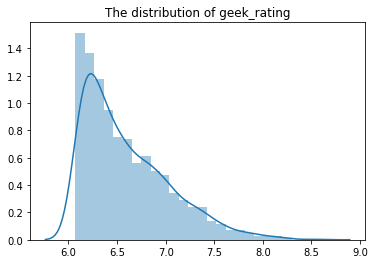

(6.066, 6.322]    704
(6.322, 6.573]    441
(6.573, 6.825]    323
(6.825, 7.077]    236
(7.077, 7.328]    139
(7.328, 7.58]      89
(7.58, 7.832]      37
(7.832, 8.084]     19
(8.084, 8.335]      9
(8.335, 8.587]      2
Name: geek_rating, dtype: int64


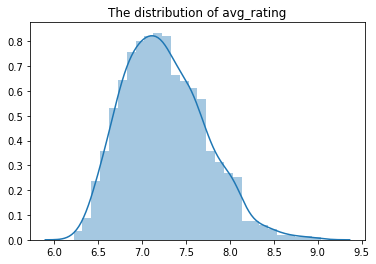

(6.215999999999999, 6.502]     60
(6.502, 6.784]                265
(6.784, 7.066]                438
(7.066, 7.348]                455
(7.348, 7.63]                 361
(7.63, 7.912]                 239
(7.912, 8.194]                125
(8.194, 8.476]                 34
(8.476, 8.758]                 16
(8.758, 9.04]                   6
Name: avg_rating, dtype: int64


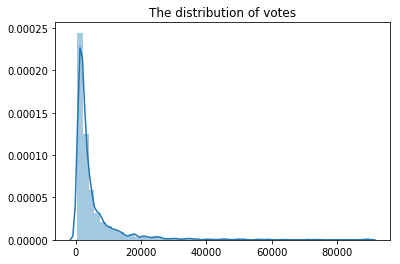

(238.67, 9260.9]      1716
(9260.9, 18193.8]      173
(18193.8, 27126.7]      61
(27126.7, 36059.6]      21
(36059.6, 44992.5]       9
(44992.5, 53925.4]       9
(53925.4, 62858.3]       4
(62858.3, 71791.2]       2
(71791.2, 80724.1]       1
(80724.1, 89657.0]       3
Name: votes, dtype: int64


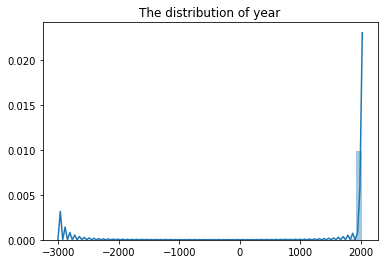

(-3005.02, -2498.1]       1
(-2498.1, -1996.2]        1
(-1996.2, -1494.3]        0
(-1494.3, -992.4]         0
(-992.4, -490.5]          0
(-490.5, 11.4]            1
(11.4, 513.3]             0
(513.3, 1015.2]           1
(1015.2, 1517.1]          1
(1517.1, 2019.0]       1994
Name: year, dtype: int64


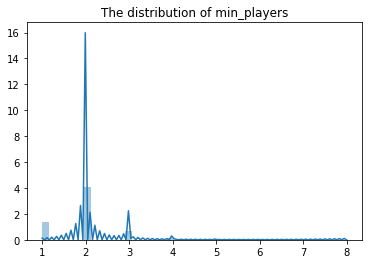

(0.992, 1.7]     429
(1.7, 2.4]      1299
(2.4, 3.1]       223
(3.1, 3.8]         0
(3.8, 4.5]        37
(4.5, 5.2]         7
(5.2, 5.9]         0
(5.9, 6.6]         2
(6.6, 7.3]         0
(7.3, 8.0]         2
Name: min_players, dtype: int64


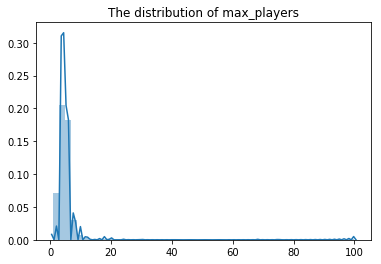

(0.9, 10.9]      1962
(10.9, 20.8]       27
(20.8, 30.7]        2
(30.7, 40.6]        0
(40.6, 50.5]        0
(50.5, 60.4]        0
(60.4, 70.3]        1
(70.3, 80.2]        1
(80.2, 90.1]        0
(90.1, 100.0]       6
Name: max_players, dtype: int64


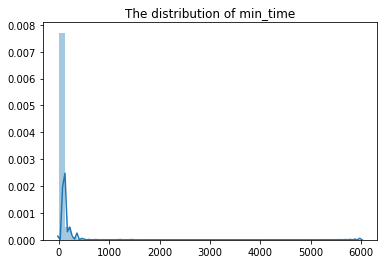

(-5.0, 600.9]       1995
(600.9, 1200.8]        2
(1200.8, 1800.7]       1
(1800.7, 2400.6]       0
(2400.6, 3000.5]       0
(3000.5, 3600.4]       0
(3600.4, 4200.3]       0
(4200.3, 4800.2]       0
(4800.2, 5400.1]       0
(5400.1, 6000.0]       1
Name: min_time, dtype: int64


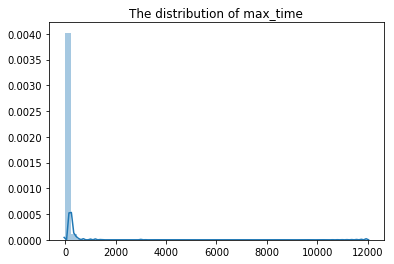

(-9.998999999999999, 1201.8]    1995
(1201.8, 2401.6]                   1
(2401.6, 3601.4]                   1
(3601.4, 4801.2]                   0
(4801.2, 6001.0]                   1
(6001.0, 7200.8]                   0
(7200.8, 8400.6]                   0
(8400.6, 9600.4]                   0
(9600.4, 10800.2]                  0
(10800.2, 12000.0]                 1
Name: max_time, dtype: int64


In [41]:
for col in df.select_dtypes(np.number).columns:
    sns.distplot(df[col])
    plt.title(f"The distribution of {col}")
    plt.xlabel("")
    plt.show()
    print(df[col].value_counts(bins=10, sort=False))

> To further investigate:
    - board games with years in the negative
    - what board games have max players over 20 people? sounds like it wouldn't fit on a board
    - what board game has a minimum time of 6000 minutes?! 

#### Board games with negative years

In [46]:
df [df.year < 1400]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
150,Go,7.343,7.64,13691,-2200,2,2,30,180,(Uncredited),['Abstract Strategy'],['Enclosure'],"['(Public Domain)', '(Self-Published)', '(Unkn...",appearance two player taking turn laying stone...
1215,Backgammon,6.360,6.53,10625,-3000,2,2,30,30,(Uncredited),"['Abstract Strategy', 'Dice']","['Betting and Bluffing', 'Dice Rolling', 'Roll...","['(Public Domain)', '(Unknown)', '3M', 'Alga',...",backgammon classic abstract strategy game dati...
1224,Xiangqi,6.354,7.14,1738,762,2,2,60,60,(Uncredited),['Abstract Strategy'],['Grid Movement'],"['(Public Domain)', '(Unknown)', 'Carlton Book...",xiangqi one played board game world translated...
1400,Carrom,6.282,7.00,1467,0,2,4,60,60,(Uncredited),['Action / Dexterity'],"['Flicking', 'Team-Based Game']","['(Public Domain)', '(Unknown)', 'ABRA', 'ASS ...",carrom easily described quotfinger poolquot 29...


I thought these were typos. 
- Go definitely originated in BC time. Documents state origin times between 2000 and 5000 years ago
- Research states that backgammon is about 5000 years old
- Xiangpi also appears to be in the correct range.
- It is unknown when Carrom originated. It became popular in the 19th century, but is believed to have been around much longer. 

> All year dates will be left as is. They are obvious outliers and may be removed later, or appropriately scaled. 

#### Board games with a high number of max players

In [48]:
df [df.max_players > 20]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
135,Welcome To...,7.373,7.65,9934,2018,1,100,25,25,Benoit Turpin,['City Building'],"['Paper-and-Pencil', 'Pattern Building']","['Blue Cocker Games', 'Broadway Toys LTD', 'De...",architect welcome want build best new town uni...
641,Ricochet Robots,6.743,7.00,7457,1999,1,99,30,30,Alex Randolph,"['Abstract Strategy', 'Maze', 'Puzzle', 'Real-...","['Grid Movement', 'Modular Board']","['Hans im Glück', 'ABACUSSPIELE', 'Devir', 'Gé...",ricochet robot le game puzzle explains there's...
674,Cartographers: A Roll Player Tale,6.709,7.67,1782,2019,1,100,30,45,Jordy Adan,"['Fantasy', 'Territory Building']","['Line Drawing', 'Paper-and-Pencil']","['Thunderworks Games', 'Gen-X Games', 'Grok Ga...",queen gimnax ordered reclamation northern land...
813,Two Rooms and a Boom,6.604,7.04,3815,2013,6,30,7,20,Alan Gerding,"['Bluffing', 'Card Game', 'Deduction', 'Negoti...","['Acting', 'Team-Based Game', 'Variable Player...",['Tuesday Knight Games'],two room boom ndash social deductionhidden rol...
844,Ultimate Werewolf: Ultimate Edition,6.581,7.05,3552,2008,5,68,30,90,Ted Alspach,"['Bluffing', 'Card Game', 'Deduction', 'Horror...","['Player Elimination', 'Role Playing', 'Team-B...","['Bézier Games', 'Arclight', 'Ediciones MasQue...",quiet little 16th century village suddenly bec...
869,Eat Poop You Cat,6.564,7.48,1525,1984,3,99,20,20,(Uncredited),"['Humor', 'Party Game']",['Paper-and-Pencil'],['(Public Domain)'],player start piece paper pencil top paper play...
1167,Star Trek: Attack Wing,6.386,7.53,1754,2013,2,99,60,60,Christopher Guild,"['Aviation / Flight', 'Miniatures', 'Movies / ...","['Action Queue', 'Dice Rolling', 'Simultaneous...",['WizKids'],game description publisher1010star trek attack...
1431,Werewolf,6.268,6.57,4178,1986,8,24,60,60,Dimitry Davidoff,"['Bluffing', 'Deduction', 'Horror', 'Murder/My...","['Alliances', 'Hidden Roles', 'Negotiation', '...","['(Public Domain)', '(Self-Published)', '(Web ...",werewolf take place small village haunted were...
1541,Ultimate Werewolf: Deluxe Edition,6.223,7.14,1343,2014,5,75,30,30,Ted Alspach,"['Bluffing', 'Card Game', 'Deduction', 'Horror...","['Player Elimination', 'Role Playing', 'Team-B...","['Bézier Games', 'Siam Board Games']",ultimate werewolf interactive game deduction t...


#### Board games with high minimum times 

In [56]:
df [df.min_time > 600]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1121,The Civil War,6.410,7.67,1092,1983,2,2,1200,1200,Eric Lee Smith,"['American Civil War', 'Civil War', 'Post-Napo...","['Dice Rolling', 'Hexagon Grid', 'Simulation']",['Victory Games (I)'],sprawling rendition american civil war try fit...
1155,Europe Engulfed,6.389,7.50,1246,2003,2,3,720,720,Jesse Evans,"['Wargame', 'World War II']","['Action Points', 'Area Movement', 'Dice Rolli...",['GMT Games'],gmt website1010more thirteen year design devel...
1162,Empires in Arms,6.388,7.57,1179,1983,2,7,6000,12000,Greg Pinder,"['Economic', 'Napoleonic', 'Negotiation', 'Pol...","['Area Movement', 'Dice Rolling', 'Secret Unit...","['Australian Design Group', 'The Avalon Hill G...",back box avalon hill edition1010empires arm ga...
1661,Rise and Decline of the Third Reich,6.181,6.85,1746,1974,2,6,1440,1440,Don Greenwood,"['Negotiation', 'Political', 'Wargame', 'World...","['Dice Rolling', 'Hexagon Grid', 'Simulation']","['The Avalon Hill Game Co', 'Hobby Japan']",rise decline third reich realistic simulation ...


> What is 'Empire in Arms' and why would anyone play such a long game? 

#### Correlations

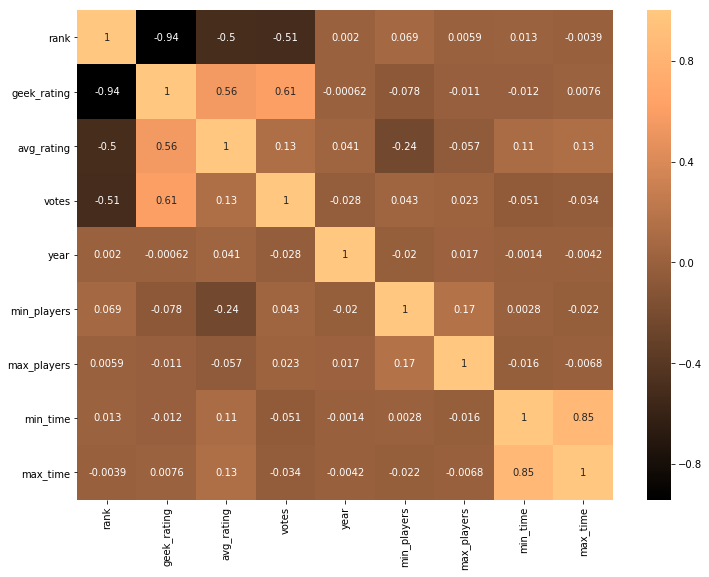

In [89]:
plt.figure(figsize=(12,9))
sns.heatmap(df.reset_index().corr(), annot=True, cmap="copper")
plt.show()

sns.pairplot(df)
plt.show()

> There is some correlation with the geek_rating and avg_rating and votes. This makes sense as the geek_rating is a weighted value based on the those two features. 

> There is also a high correlation between min_time and max_time, which also makes sense, as games times typically fall into a relatively small range. 